# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv(r"C:\Users\susan\Downloads\megaline_calls (1).csv")
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_internet= pd.read_csv(r"c:\Users\susan\Downloads\megaline_internet.csv")
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
df_messages= pd.read_csv(r"c:\Users\susan\Downloads\megaline_messages.csv")
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
df_plans= pd.read_csv(r"c:\Users\susan\Downloads\megaline_plans.csv")
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
df_users= pd.read_csv(r"c:\Users\susan\Downloads\megaline_users.csv")
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Preparar los datos

## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


## Corregir datos

No hay valores nulos, ni valores duplicados(deja así hasta este momento)

## Enriquecer los datos

In [10]:
#no hacer nada por el momento para este DF

## Usuarios/as

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
138,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,NaN
53,1053,Piper,Espinoza,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-30,surf,NaN
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
48,1048,Linwood,Terrell,42,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-24,surf,NaN
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
362,1362,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,surf,NaN
487,1487,Elton,Simpson,18,"Cape Coral-Fort Myers, FL MSA",2018-08-16,ultimate,NaN


In [13]:
#Verificar duplicados
df_users.duplicated().sum()

np.int64(0)


1. La columna churn_date presenta valores ausentes, esta fecha decribe la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos), se puede dar un manejo, no odificar por el momento.
2. No hay valores duplicados.
3. Cambiar el nombre a plan_name, ya que nos ayudará unir los DF


### Corregir los datos

In [14]:
#Cambiar reg_date a variable fecha, ya que esta variable no está en el formato adecuado

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors='coerce')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [15]:
#Cambiar el nombre la columna plan a plan_name no servirá más adelante para unir los DF
df_users = df_users.rename(columns={'plan': 'plan_name'})
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [16]:
#Extraer el mes
df_users ['month'] =df_users['reg_date'].dt.month
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     object        
 8   month       500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 33.3+ KB


## Llamadas

In [17]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)

,id,user_id,call_date,duration
90981,1328_611,1328,2018-12-18,5.11
42133,1155_81,1155,2018-05-11,4.58
54662,1196_552,1196,2018-10-07,0.00
40571,1150_37,1150,2018-12-27,0.00
71488,1254_491,1254,2018-10-12,0.94
79989,1287_38,1287,2018-12-15,8.43
58671,1212_89,1212,2018-08-26,11.62
110599,1390_48,1390,2018-07-19,9.63
60651,1219_178,1219,2018-12-31,4.75
13928,1059_149,1059,2018-05-02,0.29


In [19]:
#Verificar valores duplicados
df_calls.duplicated().sum()

np.int64(0)

**Análisis**:
El DataFrame calls no tiene valores nulos, no presenta valores duplicados, pero la variable call_date debe cambiarse a datetime

### Corregir los datos

In [20]:
#Cambiar call_date a datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce', infer_datetime_format=True)

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


C:\Users\susan\AppData\Local\Temp\ipykernel_11396\2805277978.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce', infer_datetime_format=True)


### Enriquecer los datos

In [21]:
#Más adelante debemos fusionar la cinco tablas, voy a extraer month
df_calls['month']=df_calls['call_date'].dt.month
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


In [22]:
#Cambiar el nombre id a identificador_llamada para simplificar el análisis, y no generar confusión con los otros id
df_calls = df_calls.rename(columns={'id': 'identificador_llamada'})

# Verificar los primeros resultados
print(df_calls.head())

  identificador_llamada  user_id  call_date  duration  month
0               1000_93     1000 2018-12-27      8.52     12
1              1000_145     1000 2018-12-27     13.66     12
2              1000_247     1000 2018-12-27     14.48     12
3              1000_309     1000 2018-12-28      5.76     12
4              1000_380     1000 2018-12-30      4.22     12


## Mensajes

In [23]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)

,id,user_id,message_date
15736,1103_100,1103,2018-12-23
27210,1167_167,1167,2018-11-13
73460,1471_163,1471,2018-10-30
28404,1174_194,1174,2018-11-23
62403,1392_178,1392,2018-12-09
9842,1075_97,1075,2018-10-18
35019,1223_115,1223,2018-12-28
65271,1419_80,1419,2018-12-15
54242,1343_333,1343,2018-09-30
50653,1329_855,1329,2018-12-27


In [25]:
#Verificar valores duplicados
df_messages.duplicated().sum()

np.int64(0)

### Corregir los datos

No hay valores duplicados, ni valores nulos, solo cambiar la variable message_date a datetime

In [26]:
#Cambiar message_date a variable fecha
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [27]:
#Más adelante debemos fusionar la cinco tablas, voy a extraer month
df_messages['month']=df_messages['message_date'].dt.month
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


In [28]:
#Cambiar el nombre id a identificador_sms para simplificar el análisis, y no generar confusión con los otros id
df_messages = df_messages.rename(columns={'id': 'identificador_sms'})

# Verificar los primeros resultados
df_messages.head()

,identificador_sms,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [29]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
38288,1171_659,1171,2018-08-25,509.47
44720,1198_94,1198,2018-09-12,0.00
51906,1232_504,1232,2018-10-21,293.50
287,1002_173,1002,2018-12-07,284.04
30136,1138_369,1138,2018-04-02,0.00
39095,1175_232,1175,2018-11-17,200.18
48149,1214_523,1214,2018-07-09,206.45
22449,1102_14,1102,2018-12-20,67.67
100519,1476_26,1476,2018-07-08,978.35
60208,1272_20,1272,2018-12-30,490.11


In [31]:
#Verificar valores duplicados
df_internet.duplicated().sum()

np.int64(0)

**Análisis:**
No hay valores duplicados, ni valores nulos, la variable session_date se debe cambiar a datetime

### Corregir los datos

In [32]:
#Cambiar la variable session_date de object a datetime
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [33]:
#Más adelante debemos fusionar la cinco tablas, voy a extraer month
df_internet['month']=df_internet['session_date'].dt.month
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   identificador_sms  76051 non-null  object        
 1   user_id            76051 non-null  int64         
 2   message_date       76051 non-null  datetime64[ns]
 3   month              76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


In [34]:
#Cambiar el nombre id a identificador_sesión para simplificar el análisis, y puede ser usado más adelante
df_internet = df_internet.rename(columns={'id': 'identificador_sesión'})

# Verificar los primeros resultados
df_internet.head()

,identificador_sesión,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

In [35]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


La empresa ofrece Megaline a sus clientes dos tarifas de prepago:


**Surf:**

Pago mensual: $20.  

500 minutos al mes, 50 SMS y 15 GB de datos.  

Si se exceden los límites del paquete:

1 minuto: 3 centavos.

1 SMS: 3 centavos.

1 GB de datos: $10.

**Ultimate:**

Pago mensual: $70.

3000 minutos al mes, 1000 SMS y 30 GB de datos.

Si se exceden los límites del paquete:

1 minuto: 1 centavo.

1 SMS: 1 centavo.

1 GB de datos: $7.

## Agregar datos por usuario

Agregar los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior. Para el parámetro how se utilizó inner, ya que esté nos permite mantener solo las filas con valores coincidentes en ambas tablas.

In [36]:
# Unir df_users y df_calls por 'user_id' y 'month'
df_merged = pd.merge(df_users, df_calls, on=['user_id', 'month'], how='inner')

In [37]:
# Unir df_merged y df_internet por 'user_id' y 'month'
df_merged = pd.merge(df_merged, df_internet, on=['user_id', 'month'], how='inner')

In [38]:
# Unir df_merged y df_internet por 'user_id' y 'month'
df_merged = pd.merge(df_merged, df_messages, on=['user_id', 'month'], how='inner')

In [39]:
# Añade la información de la tarifa
df_merged = pd.merge(df_merged, df_plans, on='plan_name', how='inner')

In [40]:
#Validar valores nulos
df_merged.isna().sum()

user_id                        0
first_name                     0
last_name                      0
age                            0
city                           0
reg_date                       0
plan_name                      0
churn_date               7784977
month                          0
identificador_llamada          0
call_date                      0
duration                       0
identificador_sesión           0
session_date                   0
mb_used                        0
identificador_sms              0
message_date                   0
messages_included              0
mb_per_month_included          0
minutes_included               0
usd_monthly_pay                0
usd_per_gb                     0
usd_per_message                0
usd_per_minute                 0
dtype: int64

In [41]:
df_merged['churn_date'] = df_merged['churn_date'].fillna('otro')

# Contar los valores en la columna (incluye todos los registros no nulos)
print(df_merged['churn_date'].count())

8059152


In [42]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado
#Voy usar el identificador_llamada, ya que este identificador es único para cada llamada
num_llamadas= df_merged.groupby(['user_id', 'month'])['identificador_llamada'].count().reset_index(name='num_llamadas')

# Verificar los primeros resultados
num_llamadas.head()

,user_id,month,num_llamadas
0,1000,12,880
1,1001,8,20250
2,1002,10,3465
3,1004,5,2499
4,1006,11,210


In [43]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
total_minutos= df_merged.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutos')

print(total_minutos)

     user_id  month  total_minutos
0       1000     12        6425.65
1       1001      8      128355.00
2       1002     10       17050.95
3       1004      5       21608.02
4       1006     11         978.60
..       ...    ...            ...
181     1479     11        4335.60
182     1480     12      521740.20
183     1481     12         398.28
184     1486     12      176261.40
185     1497     12      428621.50

[186 rows x 3 columns]


In [44]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Voy usar el identificador_sms, ya que este identificador es único para cada llamada
total_messages= df_merged.groupby(['user_id', 'month'])['identificador_sms'].count().reset_index(name='total_messages')

# Ver los resultados
print(total_messages)


     user_id  month  total_messages
0       1000     12             880
1       1001      8           20250
2       1002     10            3465
3       1004      5            2499
4       1006     11             210
..       ...    ...             ...
181     1479     11             664
182     1480     12           71400
183     1481     12              72
184     1486     12           24300
185     1497     12           83700

[186 rows x 3 columns]


In [45]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
volumen_internet = df_merged.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='volumen_internet')

# Convertir a gigabytes, redondeando hacia arriba
volumen_internet['volumen_internet'] = np.ceil(volumen_internet['volumen_internet'] / 1024)

# Ver los resultados
print(volumen_internet)


     user_id  month  volumen_internet
0       1000     12             327.0
1       1001      8            5474.0
2       1002     10            1056.0
3       1004      5             940.0
4       1006     11              61.0
..       ...    ...               ...
181     1479     11             335.0
182     1480     12           30699.0
183     1481     12              23.0
184     1486     12            8927.0
185     1497     12           29285.0

[186 rows x 3 columns]


In [46]:
# Unir todos los DataFrames calculados con df_merged de una sola vez
df_merged = pd.merge(df_merged, num_llamadas, on=['user_id', 'month'], how='left')
df_merged = pd.merge(df_merged, total_minutos, on=['user_id', 'month'], how='left')
df_merged = pd.merge(df_merged, total_messages, on=['user_id', 'month'], how='left')
df_merged = pd.merge(df_merged, volumen_internet, on=['user_id', 'month'], how='left')

# Verificar el resultado final
print(df_merged.head())

   user_id first_name last_name  age                                   city  \
0     1000   Anamaria     Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1000   Anamaria     Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
2     1000   Anamaria     Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
3     1000   Anamaria     Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
4     1000   Anamaria     Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   

    reg_date plan_name churn_date  month identificador_llamada  ...  \
0 2018-12-24  ultimate       otro     12               1000_93  ...   
1 2018-12-24  ultimate       otro     12               1000_93  ...   
2 2018-12-24  ultimate       otro     12               1000_93  ...   
3 2018-12-24  ultimate       otro     12               1000_93  ...   
4 2018-12-24  ultimate       otro     12               1000_93  ...   

  mb_per_month_included  minutes_included usd_monthly_pay usd_per_gb  \
0                 30720   

In [ ]:
#Comprobar si después de la fución se genaron valores nulos
df_merged.isna().sum()

user_id                  0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
plan_name                0
churn_date               0
month                    0
identificador_llamada    0
call_date                0
duration                 0
identificador_sesión     0
session_date             0
mb_used                  0
identificador_sms        0
message_date             0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
num_llamadas             0
total_minutos            0
total_messages           0
volumen_internet         0
extra_minutes            0
extra_sms                0
extra_data               0
extra_charges            0
monthly_revenue          0
dtype: int64

In [47]:
def calcular_ingreso_mensual(df):
    # Calcular excedentes de uso y cargos adicionales
    df['extra_minutes'] = (df['total_minutos'] - df['minutes_included']).clip(lower=0)
    df['extra_sms'] = (df['total_messages'] - df['messages_included']).clip(lower=0)
    df['extra_data'] = (df['volumen_internet'] - df['mb_per_month_included']).clip(lower=0)

    # Multiplicar por tarifas para obtener cargos adicionales
    df['extra_charges'] = (
        df['extra_minutes'] * df['usd_per_minute'] +
        df['extra_sms'] * df['usd_per_message'] +
        df['extra_data'] * df['usd_per_gb']
    )

    # Calcular el ingreso mensual total y añadirlo al DataFrame
    df['monthly_revenue'] = df['usd_monthly_pay'] + df['extra_charges']

# Llamar a la función para actualizar el DataFrame `df_merged` directamente
calcular_ingreso_mensual(df_merged)

# Ver los primeros resultados
print(df_merged[['user_id', 'month', 'monthly_revenue']].head())

   user_id  month  monthly_revenue
0     1000     12         104.2565
1     1000     12         104.2565
2     1000     12         104.2565
3     1000     12         104.2565
4     1000     12         104.2565


Calcular los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas)

## Estudia el comportamiento de usuario

### Llamadas

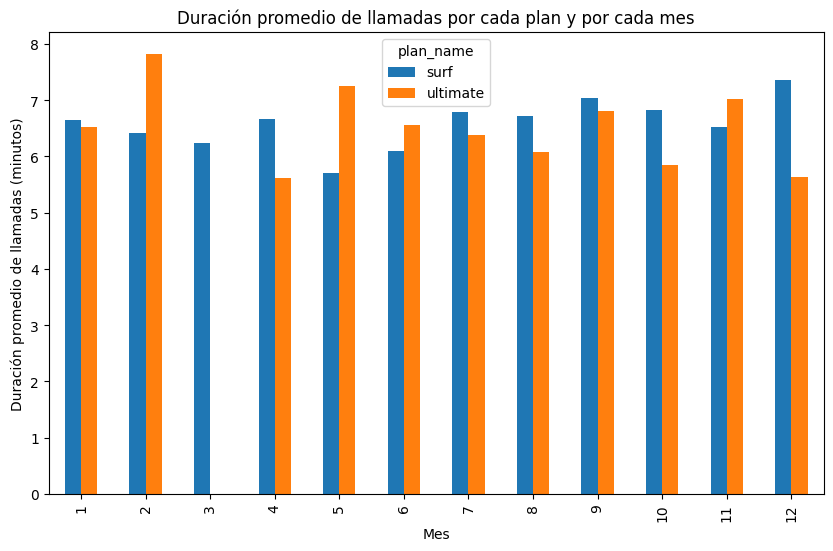

In [48]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
promedio_llamada_por_mes = df_merged.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

# Traza un gráfico de barras para visualizar la duración promedio de llamadas por cada plan y mes
promedio_llamada_por_mes.pivot(index='month', columns='plan_name', values='duration').plot(
    kind='bar', figsize=(10, 6), title='Duración promedio de llamadas por cada plan y por cada mes'
)

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.show()

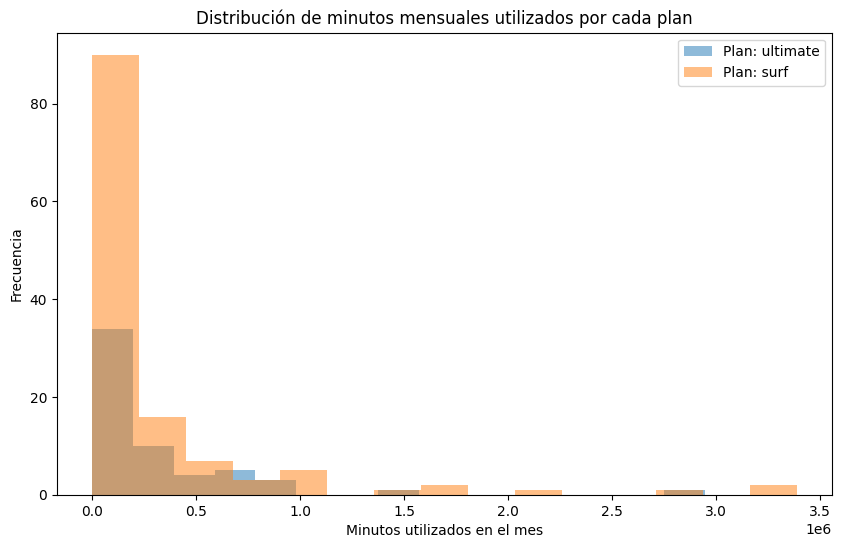

In [49]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutos_mensuales = df_merged.groupby(['user_id', 'plan_name', 'month'])['duration'].sum().reset_index()

# Traza un histograma para visualizar el uso de minutos mensuales por cada plan
plt.figure(figsize=(10, 6))
for plan in minutos_mensuales['plan_name'].unique():
    plt.hist(
        minutos_mensuales[minutos_mensuales['plan_name'] == plan]['duration'], 
        bins=15, alpha=0.5, label=f'Plan: {plan}'
    )

plt.title('Distribución de minutos mensuales utilizados por cada plan')
plt.xlabel('Minutos utilizados en el mes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Se puede visualizar que hay sesgo a la derecha, no se parece a una distribución normal

Calcular la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [50]:
# Calcula la media y la varianza de la duración mensual de llamadas.
estadisticas_llamada = df_merged.groupby('plan_name')['duration'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para una mejor comprensión
estadisticas_llamada.columns = ['plan_name', 'media_duracion', 'varianza_duracion']

# Mostrar resultados
print(estadisticas_llamada)

  plan_name  media_duracion  varianza_duracion
0      surf        6.889053          35.183547
1  ultimate        6.346197          32.710686


El promedio de duración de las llamadas para ambos planeas está alredor de los 7 minutos

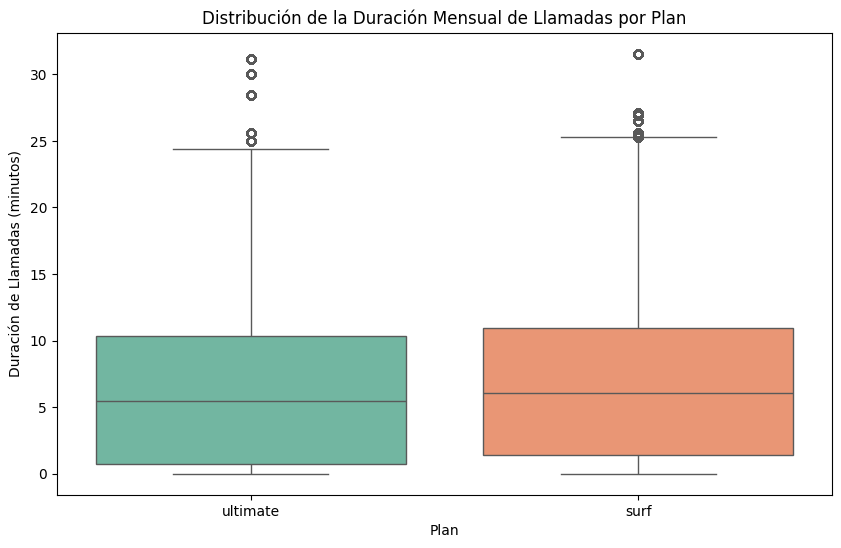

In [51]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='plan_name', y='duration', hue='plan_name', palette="Set2", legend=False)

# Títulos y etiquetas
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración de Llamadas (minutos)')
plt.show()

***Conclusiones**
Se comprueba, lo que el gráfico anterior nos estaba reflejando, hay valores atípico0s, se puede decir visualimente que medias son casi iguales, más adelante se comprobará o rechará esta hipótesis.

### Mensajes

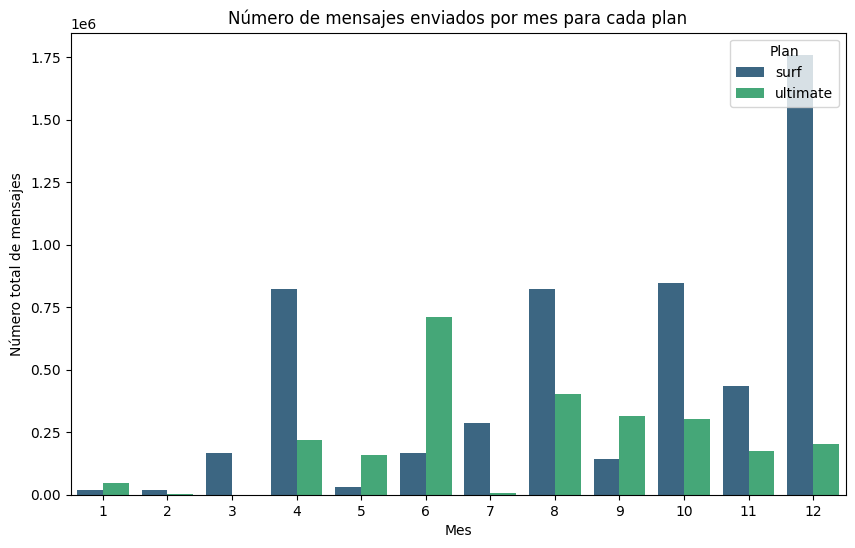

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_por_mes = df_merged.groupby(['plan_name', 'month'])['identificador_sms'].count().reset_index(name='total_messages')

# Traza un gráfico de barras para visualizar la cantidad de mensajes por cada plan y mes
plt.figure(figsize=(10, 6))
sns.barplot(data=mensajes_por_mes, x='month', y='total_messages', hue='plan_name', palette='viridis')

plt.title('Número de mensajes enviados por mes para cada plan')
plt.xlabel('Mes')
plt.ylabel('Número total de mensajes')
plt.legend(title='Plan', loc='upper right')
plt.show()

In [53]:
# Calcula la media y la varianza para los mensajes.
total_mensajes = df_merged.groupby(['user_id', 'month'])['identificador_sms'].count().reset_index(name='total_messages')

# Unir total_mensajes con df_merged para incluir la columna 'plan_name'
total_mensajes = total_mensajes.merge(df_merged[['user_id', 'month', 'plan_name']], on=['user_id', 'month'], how='left')

# Calcular la media y varianza por plan
estadisticas_mensajes = total_mensajes.groupby('plan_name')['total_messages'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para una mejor comprensión
estadisticas_mensajes.columns = ['plan_name', 'media', 'varianza']

# Mostrar resultados
print(estadisticas_mensajes)

  plan_name          media      varianza
0      surf  199687.042750  2.623835e+10
1  ultimate  166147.545218  2.135894e+10


los comportamiento varía en función del plan y el mes, revisar si hay motivos para que el mes 12 sea el mes dónde más mensajes se enviaron

### Internet

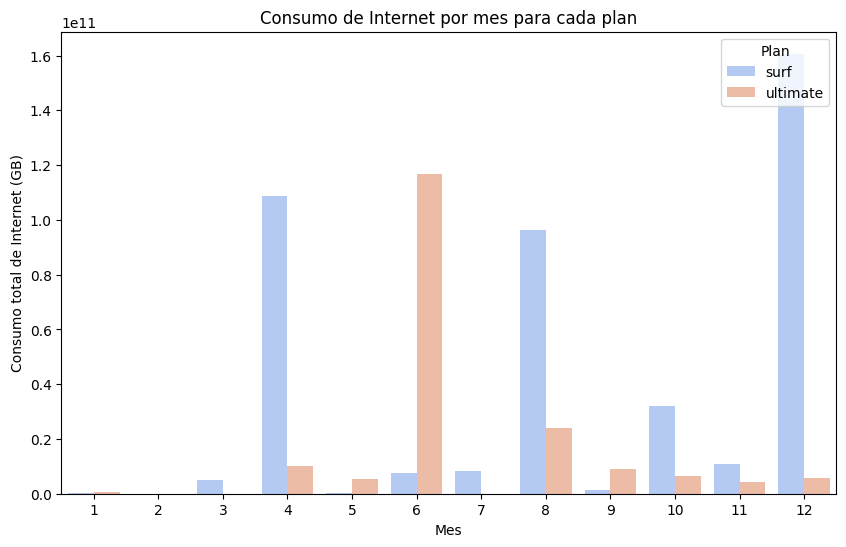

In [54]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
consumo_internet_por_mes = df_merged.groupby(['plan_name', 'month'])['volumen_internet'].sum().reset_index(name='total_internet')

# Traza un gráfico de barras para visualizar el consumo de Internet por cada plan y mes
plt.figure(figsize=(10, 6))
sns.barplot(data=consumo_internet_por_mes, x='month', y='total_internet', hue='plan_name', palette='coolwarm')

plt.title('Consumo de Internet por mes para cada plan')
plt.xlabel('Mes')
plt.ylabel('Consumo total de Internet (GB)')
plt.legend(title='Plan', loc='upper right')
plt.show()

El comportamiento de los usuarios varía en función del plan y el mes, como se ve reflejado gráficamente

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
El análisis de consumo de internet es adecuado, pero considera comentar cómo las diferencias observadas entre los planes pueden influir en la retención de los clientes o en los ingresos. También sería útil incluir un análisis sobre si existen patrones de consumo específicos para ciertos meses o grupos de usuarios.
</div>


## Ingreso

In [55]:
# Calcular estadísticas descriptivas para los ingresos de los planes
estadisticas_ingresos = df_merged.groupby('plan_name')['monthly_revenue'].agg(['mean', 'var', 'min', 'max', 'std']).reset_index()

# Renombrar las columnas para una mejor comprensión
estadisticas_ingresos.columns = ['plan_name', 'media', 'varianza', 'minimo', 'maximo', 'desviacion_estandar']

# Mostrar los resultados
print(estadisticas_ingresos)

  plan_name          media      varianza  minimo       maximo  \
0      surf  687913.031860  5.152595e+11    20.0  2084142.236   
1  ultimate  334019.858426  3.154661e+11    70.0  1524557.630   

   desviacion_estandar  
0        717815.773607  
1        561663.696365  


C:\Users\susan\AppData\Local\Temp\ipykernel_11396\1102365302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='plan_name', y='monthly_revenue', palette='Set2')


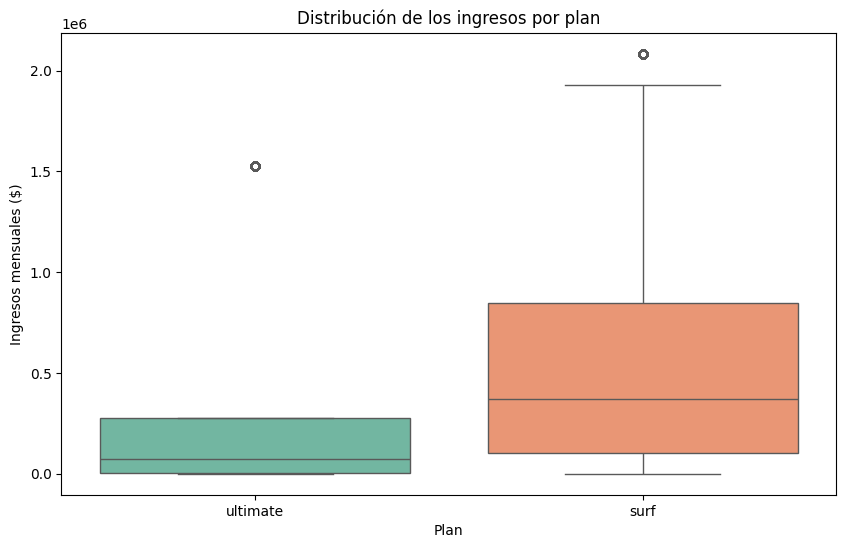

In [56]:
# Traza un gráfico de caja para los ingresos por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='plan_name', y='monthly_revenue', palette='Set2')

# Título y etiquetas del gráfico
plt.title('Distribución de los ingresos por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales ($)')

# Mostrar el gráfico
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

**Ho:** los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son iguales

**Ha:** los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

Se va a probar con un nivel de confianza del 95%, por lo cual, el valor alpha será de 5%

La prueba utilizada será la hipótesis sobre la igualdad de las medias de dos poblaciones

In [57]:
# Prueba las hipótesis
df_ultimate = df_merged[df_merged['plan_name'] == 'ultimate']['monthly_revenue']
df_surf = df_merged[df_merged['plan_name'] == 'surf']['monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(df_ultimate, df_surf)

# Imprimir los resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Tomar la decisión basada en el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Estadístico t: -693.9900801041704
Valor p: 0.0
Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes.


**Ho:** la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ son iguales al de los usuarios de otras regiones

**Ha:** la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

Se va a probar con un nivel de confianza del 95%, por lo cual, el valor alpha será de 5%

La prueba utilizada será la hipótesis sobre la igualdad de las medias de dos poblaciones

In [ ]:
city_counts = df_merged['city'].value_counts()

# Imprimir los resultados
print(city_counts)

In [69]:
# Prueba las hipótesis
# Filtrar los datos para los usuarios de la región NY-NJ y otras regiones
df_nynj = df_merged[df_merged['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
df_otros = df_merged[df_merged['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(df_nynj, df_otros, equal_var=False)  # `equal_var=False` para varianzas diferentes

# Imprimir los resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Tomar la decisión basada en el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre las dos regiones.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Estadístico t: 369.1930
Valor p: 0.0000
Rechazamos la hipótesis nula. Los ingresos promedio son significativamente diferentes entre las dos regiones.


## Conclusión general

1. En principio, se pensó que la media para ambos planes iban hacer iguales pero después de realizar pruebas estadisticas, se evidención que no.
2.  Se rechaza la hipótesis nula los ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones, se debe hacer campañas sectorizadas para esta región